<a href="https://colab.research.google.com/github/Alan-Arellano21/TLG/blob/main/Solucion_Reto_SC_63_Arellano_Lara_Alan_Alfonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Carga de datos y análisis inicial

En este apartado, cargaremos los datos proporcionados y analizaremos la estructura del conjunto, incluyendo:
- El número de registros y columnas.
- Los tipos de datos de cada variable.
- La identificación de posibles valores faltantes.

Posteriormente, exploraremos las primeras filas para verificar su estructura.


In [59]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [60]:
# Cargar los datos
data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')

# Análisis inicial
print("Número de registros y columnas:", data.shape)
print("\nTipos de datos:")
print(data.dtypes)
print("\nDatos faltantes por columna:")
print(data.isnull().sum())

# Mostrar las primeras filas
data.head()


Número de registros y columnas: (9000, 17)

Tipos de datos:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Datos faltantes por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


## Análisis de los datos cargados

El conjunto de datos contiene las siguientes características:
- **Número de registros**: 9000
- **Número de columnas**: 17
- **Datos faltantes**: No hay valores faltantes en ninguna columna.

Las primeras filas del conjunto de datos nos muestran una estructura consistente con columnas categóricas y numéricas. El siguiente paso será identificar y transformar las variables categóricas y numéricas.


In [61]:
# Identificar columnas categóricas y numéricas
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Columnas categóricas:")
print(categorical_columns)
print("\nColumnas numéricas:")
print(numeric_columns)


Columnas categóricas:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Columnas numéricas:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


## Identificación de columnas categóricas y numéricas

A partir del análisis realizado, identificamos lo siguiente:
- **Columnas categóricas**: Estas columnas contienen datos categóricos que deben ser transformados para el modelo:
  - `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `y`.

- **Columnas numéricas**: Estas columnas contienen datos numéricos, algunas de las cuales podrían requerir transformaciones si presentan sesgos:
  - `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`.

El siguiente paso será procesar las variables categóricas y numéricas para que puedan ser utilizadas por los modelos.


In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Crear una copia de los datos para trabajar con ellos
data_transformed = data.copy()

# Aplicar LabelEncoder a la variable de salida 'y'
label_encoder = LabelEncoder()
data_transformed['y'] = label_encoder.fit_transform(data_transformed['y'])

# Aplicar OneHotEncoder a las variables categóricas restantes
categorical_columns = categorical_columns.drop('y')  # Excluir 'y' ya transformada
data_transformed = pd.get_dummies(data_transformed, columns=categorical_columns, drop_first=True)

# Mostrar las primeras filas del DataFrame transformado
data_transformed.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,2666,10,318,2,97,6,1,False,False,...,False,False,False,False,True,False,False,False,True,False
1,29,1584,6,245,1,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,True
2,41,2152,17,369,1,-1,0,0,True,False,...,False,False,False,False,True,False,False,False,False,True
3,50,84,17,18,8,-1,0,0,True,False,...,True,False,False,False,False,False,False,False,False,True
4,40,0,28,496,2,182,11,1,False,False,...,True,False,False,False,False,False,False,False,True,False


## Transformación de variables categóricas

- Se utilizó `LabelEncoder` para la variable de salida `y`, convirtiéndola en una variable binaria numérica (0 y 1).
- Para las demás variables categóricas, se utilizó `OneHotEncoder` mediante `pd.get_dummies` para crear variables indicadoras, eliminando la primera categoría con el parámetro `drop_first=True`.

El DataFrame transformado ahora incluye solo variables numéricas, listas para ser utilizadas en los modelos.


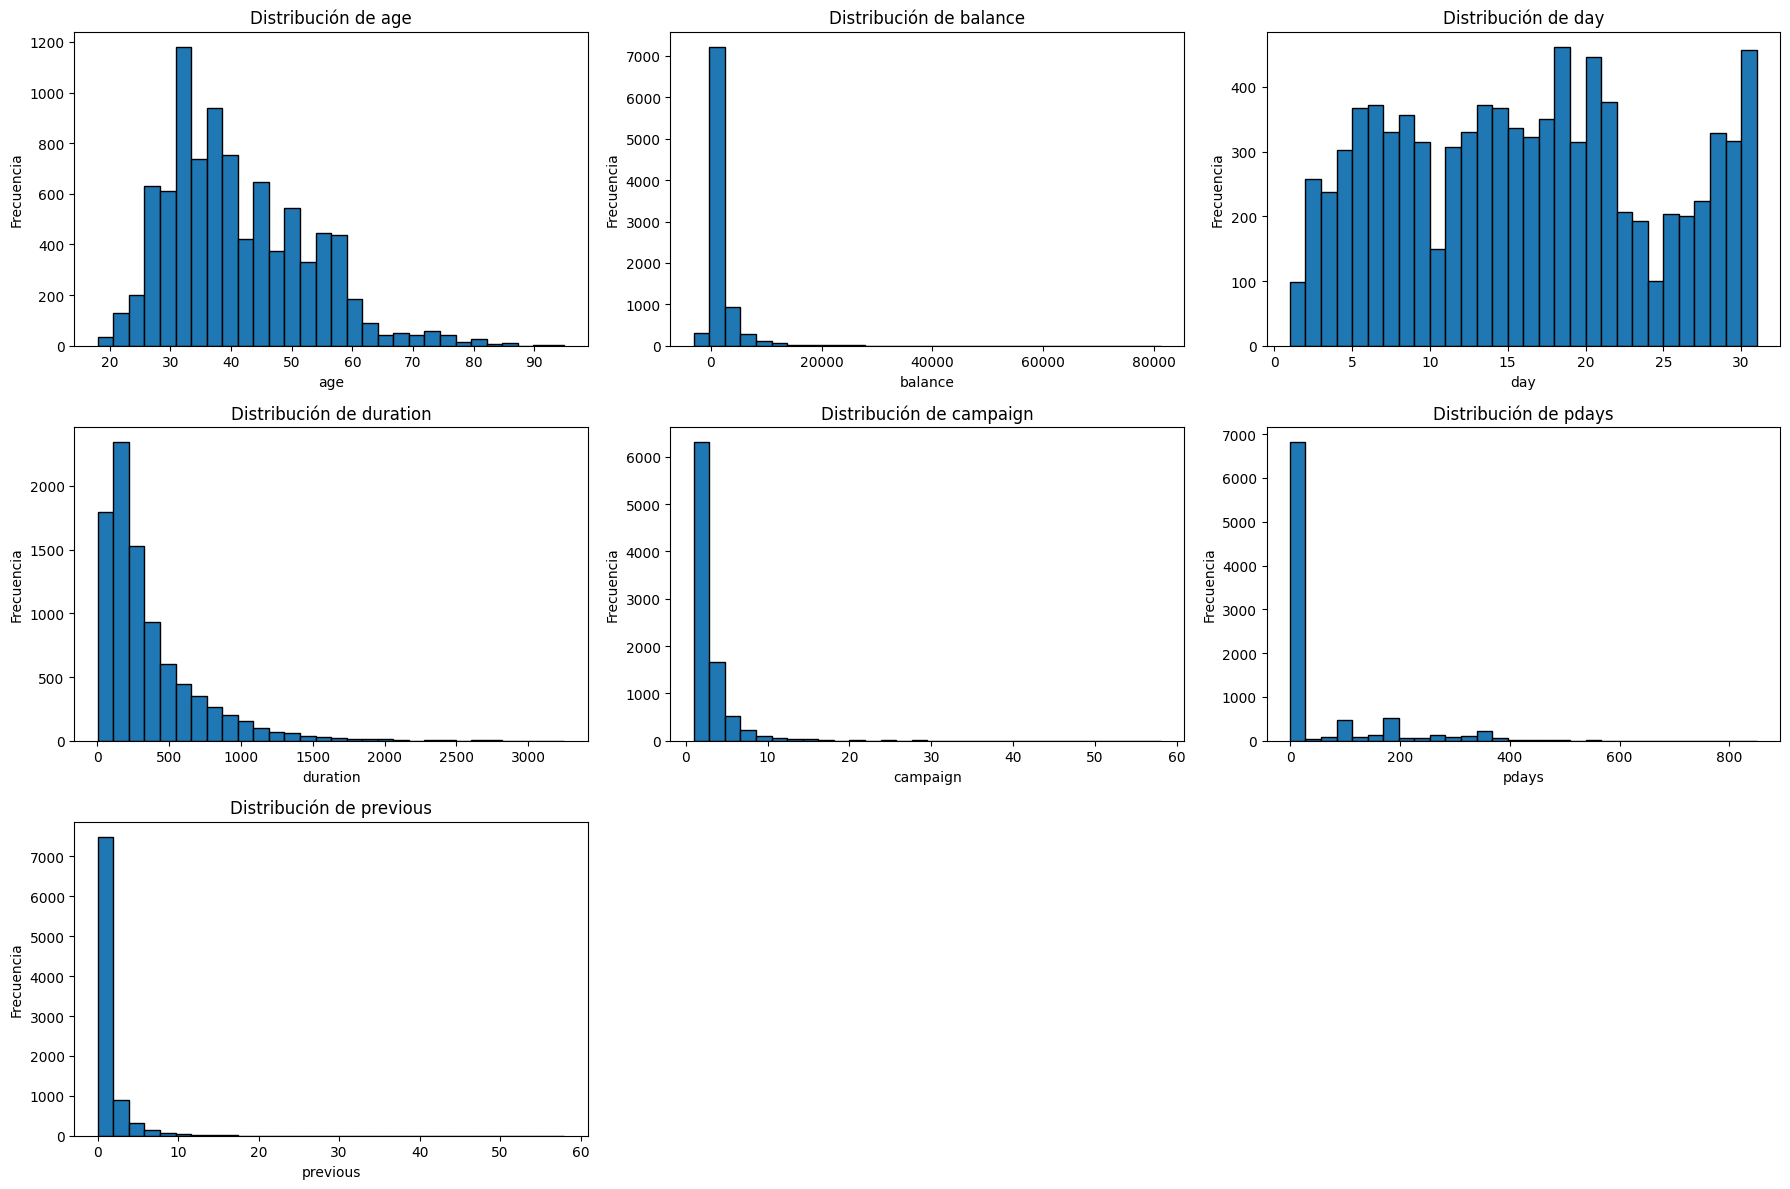

In [63]:
import matplotlib.pyplot as plt

# Crear un gráfico con subplots para todas las variables numéricas
num_columns = len(numeric_columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Calcular filas necesarias

fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for i, column in enumerate(numeric_columns):
    axes[i].hist(data_transformed[column], bins=30, edgecolor='k')
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [64]:
# Reemplazar valores negativos con 0 antes de aplicar las transformaciones
data_transformed['balance'] = data_transformed['balance'].clip(lower=0)
data_transformed['duration'] = data_transformed['duration'].clip(lower=0)
data_transformed['campaign'] = data_transformed['campaign'].clip(lower=0)
data_transformed['pdays'] = data_transformed['pdays'].clip(lower=0)
data_transformed['previous'] = data_transformed['previous'].clip(lower=0)

# Aplicar transformaciones
data_transformed['balance_log'] = np.log1p(data_transformed['balance'])
data_transformed['duration_log'] = np.log1p(data_transformed['duration'])
data_transformed['campaign_sqrt'] = np.sqrt(data_transformed['campaign'])
data_transformed['pdays_sqrt'] = np.sqrt(data_transformed['pdays'])
data_transformed['previous_sqrt'] = np.sqrt(data_transformed['previous'])

# Eliminar las columnas originales que fueron transformadas
columns_to_drop = ['balance', 'duration', 'campaign', 'pdays', 'previous']
data_transformed.drop(columns=columns_to_drop, inplace=True)

# Verificar las primeras filas nuevamente
data_transformed.head()



,age,day,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_log,duration_log,campaign_sqrt,pdays_sqrt,previous_sqrt
0,31,10,1,False,False,False,False,False,True,False,...,False,False,False,True,False,7.888710,5.765191,1.414214,9.848858,2.449490
1,29,6,1,False,False,False,False,False,False,False,...,False,True,False,False,True,7.368340,5.505332,1.000000,0.000000,0.000000
2,41,17,0,True,False,False,False,False,False,False,...,False,False,False,False,True,7.674617,5.913503,1.000000,0.000000,0.000000
3,50,17,0,True,False,False,False,False,False,False,...,False,False,False,False,True,4.442651,2.944439,2.828427,0.000000,0.000000
4,40,28,1,False,False,False,False,False,False,False,...,False,False,False,True,False,0.000000,6.208590,1.414214,13.490738,3.316625


In [65]:
from sklearn.model_selection import train_test_split

# Separar datos en variables independientes (X) y dependientes (y)
X = data_transformed.drop('y', axis=1)  # Variables predictoras
y = data_transformed['y']  # Variable objetivo

# Dividir los datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=42)

# Verificar tamaños de los conjuntos
print("Tamaños de los conjuntos:")
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Validación:", X_validation.shape, y_validation.shape)
print("Prueba:", X_test.shape, y_test.shape)


Tamaños de los conjuntos:
Entrenamiento: (5400, 42) (5400,)
Validación: (1800, 42) (1800,)
Prueba: (1800, 42) (1800,)


## Partición de los datos

Los datos fueron divididos en tres conjuntos:
- **Entrenamiento**: 5400 registros (60%) para entrenar los modelos.
- **Validación**: 1800 registros (20%) para ajustar hiperparámetros y evaluar el desempeño preliminar.
- **Prueba**: 1800 registros (20%) para evaluar el desempeño final del modelo seleccionado.

El siguiente paso será entrenar y evaluar los modelos de Regresión Logística y Red Neuronal.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Crear el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_val_pred = logistic_model.predict(X_validation)

# Evaluar el modelo en el conjunto de validación
print("Matriz de Confusión - Validación:")
print(confusion_matrix(y_validation, y_val_pred))
print("\nReporte de Clasificación - Validación:")
print(classification_report(y_validation, y_val_pred))
print("\nExactitud del modelo:", accuracy_score(y_validation, y_val_pred))


Matriz de Confusión - Validación:
[[897 161]
 [161 581]]

Reporte de Clasificación - Validación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1058
           1       0.78      0.78      0.78       742

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800


Exactitud del modelo: 0.8211111111111111


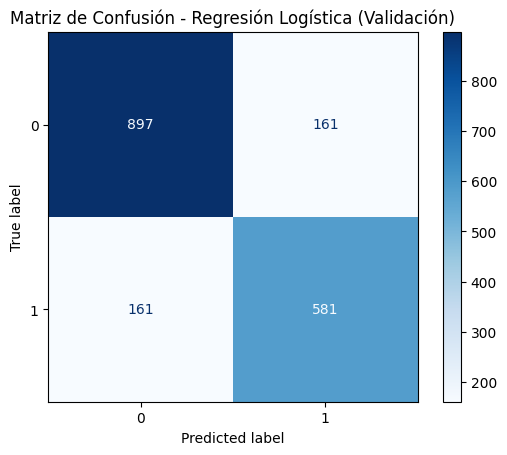

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

# Graficar la matriz de confusión con colores personalizados
disp = ConfusionMatrixDisplay.from_predictions(y_validation, y_val_pred, cmap='Blues', colorbar=True)
disp.ax_.set_title('Matriz de Confusión - Regresión Logística (Validación)')
plt.show()



## Resultados preliminares: Regresión Logística

El modelo de Regresión Logística obtuvo los siguientes resultados en el conjunto de validación:
- **Exactitud**: 82.11%
- **Matriz de Confusión**:
  - Verdaderos Positivos: 897
  - Falsos Positivos: 161
  - Verdaderos Negativos: 581
  - Falsos Negativos: 161

El siguiente paso será entrenar y evaluar un modelo de Red Neuronal para comparar su desempeño.


Matriz de Confusión - Red Neuronal (Validación):
[[911 147]
 [160 582]]

Reporte de Clasificación - Red Neuronal (Validación):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1058
           1       0.80      0.78      0.79       742

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800


Exactitud del modelo - Red Neuronal: 0.8294444444444444


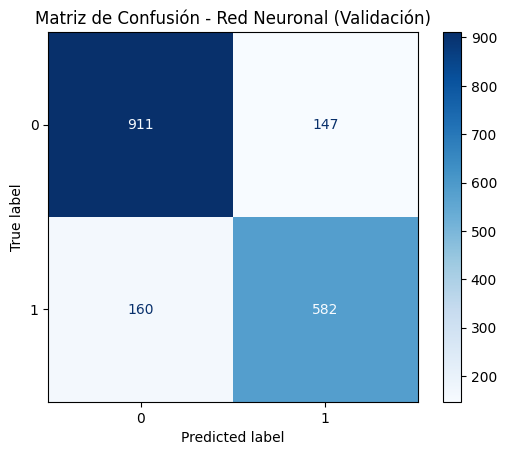

In [68]:
from sklearn.neural_network import MLPClassifier

# Crear el modelo de Red Neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
mlp_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_val_pred_nn = mlp_model.predict(X_validation)

# Evaluar el modelo en el conjunto de validación
print("Matriz de Confusión - Red Neuronal (Validación):")
print(confusion_matrix(y_validation, y_val_pred_nn))
print("\nReporte de Clasificación - Red Neuronal (Validación):")
print(classification_report(y_validation, y_val_pred_nn))
print("\nExactitud del modelo - Red Neuronal:", accuracy_score(y_validation, y_val_pred_nn))

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay.from_predictions(y_validation, y_val_pred_nn, cmap='Blues', colorbar=True)
disp.ax_.set_title('Matriz de Confusión - Red Neuronal (Validación)')
plt.show()


## Resultados preliminares: Red Neuronal

El modelo de Red Neuronal obtuvo los siguientes resultados en el conjunto de validación:
- **Exactitud**: 82.94% (ligeramente superior a la Regresión Logística).
- **Matriz de Confusión**:
  - Verdaderos Positivos: 911
  - Falsos Positivos: 147
  - Verdaderos Negativos: 582
  - Falsos Negativos: 160
- **Conclusión preliminar**:
  Aunque el modelo de Red Neuronal obtuvo una mayor exactitud general, el modelo de Regresión Logística mostró un mejor equilibrio en términos de recall y precisión para la clase positiva (1). Ambos modelos se evaluarán en el conjunto de prueba para una comparación final.


Matriz de Confusión - Regresión Logística (Prueba):
[[863 142]
 [158 637]]

Reporte de Clasificación - Regresión Logística (Prueba):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1005
           1       0.82      0.80      0.81       795

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800


Exactitud del modelo - Regresión Logística (Prueba): 0.8333333333333334


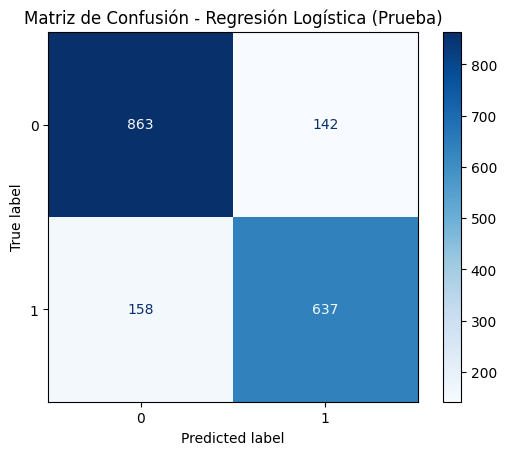


Matriz de Confusión - Red Neuronal (Prueba):
[[859 146]
 [159 636]]

Reporte de Clasificación - Red Neuronal (Prueba):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1005
           1       0.81      0.80      0.81       795

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800


Exactitud del modelo - Red Neuronal (Prueba): 0.8305555555555556


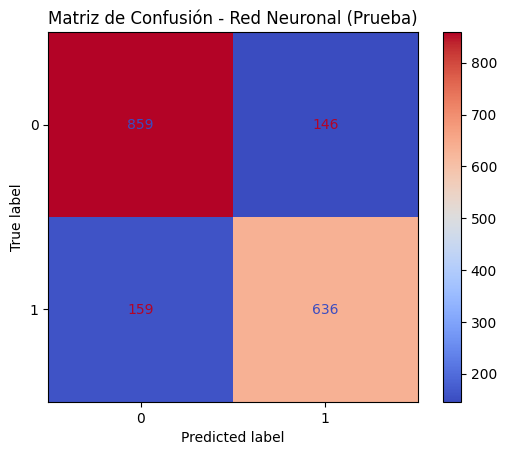

In [69]:
# Evaluar el modelo de Regresión Logística en el conjunto de prueba
y_test_pred_log = logistic_model.predict(X_test)

print("Matriz de Confusión - Regresión Logística (Prueba):")
print(confusion_matrix(y_test, y_test_pred_log))
print("\nReporte de Clasificación - Regresión Logística (Prueba):")
print(classification_report(y_test, y_test_pred_log))
print("\nExactitud del modelo - Regresión Logística (Prueba):", accuracy_score(y_test, y_test_pred_log))

# Graficar la matriz de confusión para Regresión Logística
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_log, cmap='Blues', colorbar=True)
disp.ax_.set_title('Matriz de Confusión - Regresión Logística (Prueba)')
plt.show()

# Evaluar el modelo de Red Neuronal en el conjunto de prueba
y_test_pred_nn = mlp_model.predict(X_test)

print("\nMatriz de Confusión - Red Neuronal (Prueba):")
print(confusion_matrix(y_test, y_test_pred_nn))
print("\nReporte de Clasificación - Red Neuronal (Prueba):")
print(classification_report(y_test, y_test_pred_nn))
print("\nExactitud del modelo - Red Neuronal (Prueba):", accuracy_score(y_test, y_test_pred_nn))

# Graficar la matriz de confusión para Red Neuronal
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nn, cmap='coolwarm', colorbar=True)
disp.ax_.set_title('Matriz de Confusión - Red Neuronal (Prueba)')
plt.show()


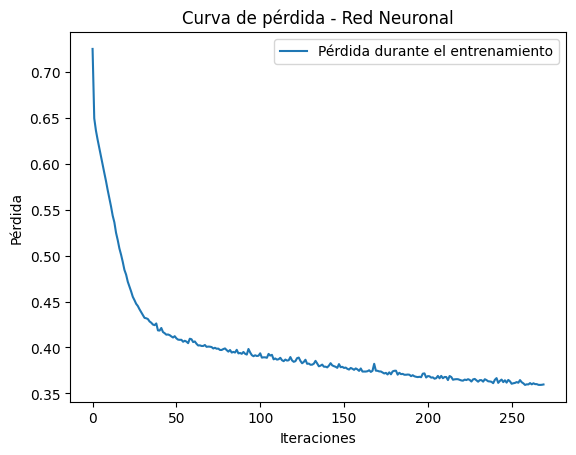

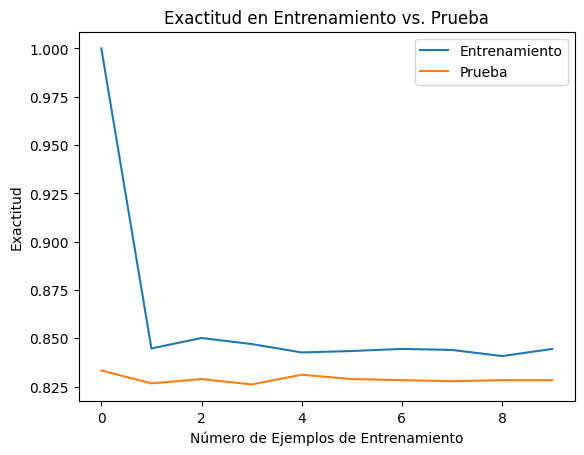

In [70]:
# Graficar la pérdida del modelo (si está disponible en loss_curve_)
if hasattr(mlp_model, 'loss_curve_'):
    plt.plot(mlp_model.loss_curve_, label="Pérdida durante el entrenamiento")
    plt.title("Curva de pérdida - Red Neuronal")
    plt.xlabel("Iteraciones")
    plt.ylabel("Pérdida")
    plt.legend()
    plt.show()

# Graficar la exactitud en entrenamiento y prueba
train_scores = []
test_scores = []

# Evaluar la exactitud del modelo con diferentes tamaños de conjunto
for i in range(1, len(X_train), int(len(X_train)/10)):
    mlp_model.partial_fit(X_train[:i], y_train[:i], classes=[0, 1])
    train_scores.append(accuracy_score(y_train[:i], mlp_model.predict(X_train[:i])))
    test_scores.append(accuracy_score(y_test, mlp_model.predict(X_test)))

plt.plot(train_scores, label="Entrenamiento")
plt.plot(test_scores, label="Prueba")
plt.title("Exactitud en Entrenamiento vs. Prueba")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Exactitud")
plt.legend()
plt.show()


## Gráficos de Evaluación del Modelo de Red Neuronal

### Curva de pérdida
La curva de pérdida muestra que el modelo de Red Neuronal converge rápidamente y estabiliza su pérdida alrededor de 0.35 después de 250 iteraciones.

### Exactitud en Entrenamiento vs. Prueba
Este gráfico muestra:
- La exactitud en el conjunto de prueba (83%) es similar a la del entrenamiento.
- El modelo tiene un buen desempeño general, sin evidencia significativa de sobreajuste.


## Resultados Finales: Comparación de Modelos

### Regresión Logística
- **Exactitud**: 83.33%
- **Precisión**: 0.85 (clase 0), 0.82 (clase 1)
- **Recall**: 0.86 (clase 0), 0.80 (clase 1)
- **F1-Score**: 0.85 (clase 0), 0.81 (clase 1)

### Red Neuronal
- **Exactitud**: 83.06%
- **Precisión**: 0.84 (clase 0), 0.81 (clase 1)
- **Recall**: 0.85 (clase 0), 0.80 (clase 1)
- **F1-Score**: 0.85 (clase 0), 0.80 (clase 1)

### Conclusión
Aunque ambos modelos presentan resultados similares, la **Regresión Logística** es más interpretable, más eficiente computacionalmente y logra un equilibrio ligeramente superior en las métricas clave. Por lo tanto, se recomienda seleccionar la Regresión Logística como modelo final para este problema.


### Conclusiones: Uso de IA en mercadotecnia

El uso de técnicas de inteligencia artificial (IA) en problemas de mercadotecnia ofrece múltiples ventajas y oportunidades para mejorar la toma de decisiones y la eficiencia operativa. En este caso, al aplicar modelos como la Regresión Logística y Redes Neuronales, se logró:

1. **Segmentación de clientes**: Las técnicas de IA permitieron identificar patrones en los datos que diferencian a los clientes más propensos a aceptar las campañas de mercadotecnia. Esto es esencial para personalizar estrategias y maximizar el retorno de inversión.

2. **Optimización de recursos**: Al identificar con mayor precisión a los clientes objetivos, se puede optimizar el uso de recursos en campañas, reduciendo esfuerzos en clientes con baja probabilidad de conversión.

3. **Toma de decisiones basada en datos**: La IA proporciona herramientas para analizar grandes volúmenes de datos, facilitando decisiones informadas y rápidas. Además, los modelos permiten justificar las decisiones con métricas claras como precisión, recall y F1-score.

4. **Interpretabilidad y eficiencia**: En este reto, la Regresión Logística demostró ser una opción balanceada entre interpretabilidad y desempeño, lo que la hace adecuada para equipos de marketing con menos experiencia técnica.

5. **Automatización**: La implementación de modelos supervisados puede integrarse en flujos automatizados para monitorear y actualizar predicciones en tiempo real, adaptándose a cambios en las tendencias de los clientes.

### Reflexión general

La inteligencia artificial no solo mejora la eficiencia de las campañas de mercadotecnia, sino que también fomenta una estrategia más centrada en el cliente, basada en datos concretos. Sin embargo, su implementación requiere una adecuada preparación de los datos, selección de modelos y análisis de las métricas clave. Además, es crucial considerar las implicaciones éticas y la transparencia en el uso de estos modelos para evitar sesgos y garantizar la equidad en las decisiones.

